In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import geopandas as gpd
import contextily as ctx

In [2]:
!kaggle datasets download -d camnugent/california-housing-prices
!unzip california-housing-prices.zip -d ../data
!rm california-housing-prices.zipkaggle config set -f

Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0




  0%|          | 0.00/400k [00:00<?, ?B/s]
100%|██████████| 400k/400k [00:05<00:00, 72.2kB/s]
100%|██████████| 400k/400k [00:05<00:00, 72.2kB/s]
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# Load the dataset
df = pd.read_csv('../data/housing.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Verify the missing values have been handled
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Data Preprocessing

In this section, we handle missing values, encode categorical variables, and prepare the dataset for model building.

**Handling Missing Values:**

We noticed that the `total_bedrooms` column has 207 missing values. We assume these represent houses without any bedrooms, so we fill these missing values with 0.

```python

# Fill missing values in 'total_bedrooms' with 0
df['total_bedrooms'].fillna(0, inplace=True)
# One-hot encode the 'ocean_proximity' column
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
# Verify the missing values have been handled
print(df.isnull().sum())



In [5]:
# Fill missing values in 'total_bedrooms' with 0
df['total_bedrooms'].fillna(0, inplace=True)

# Verify the missing values have been handled
df.isnull().sum()

C:\Users\amirh\AppData\Local\Temp\ipykernel_18444\2803485733.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(0, inplace=True)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [7]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False                      True   
1                   False                   False                      True   
2                   False                   False                      True   
3                   False                   False                      True   
4                   False                   False                      True   

   ocean_proximity_NEAR OCEAN  
0                       False  
1                       False  
2                       False  
3                       False  
4                       False

### Data Visualization with California State Background

To understand the geographical distribution of house prices and other features, we create scatter plots based on the `longitude` and `latitude` columns with California state in the background.

**Scatter Plots:**

We visualize the geographical distribution of various features by plotting `longitude` and `latitude`, color-coded by the respective features.

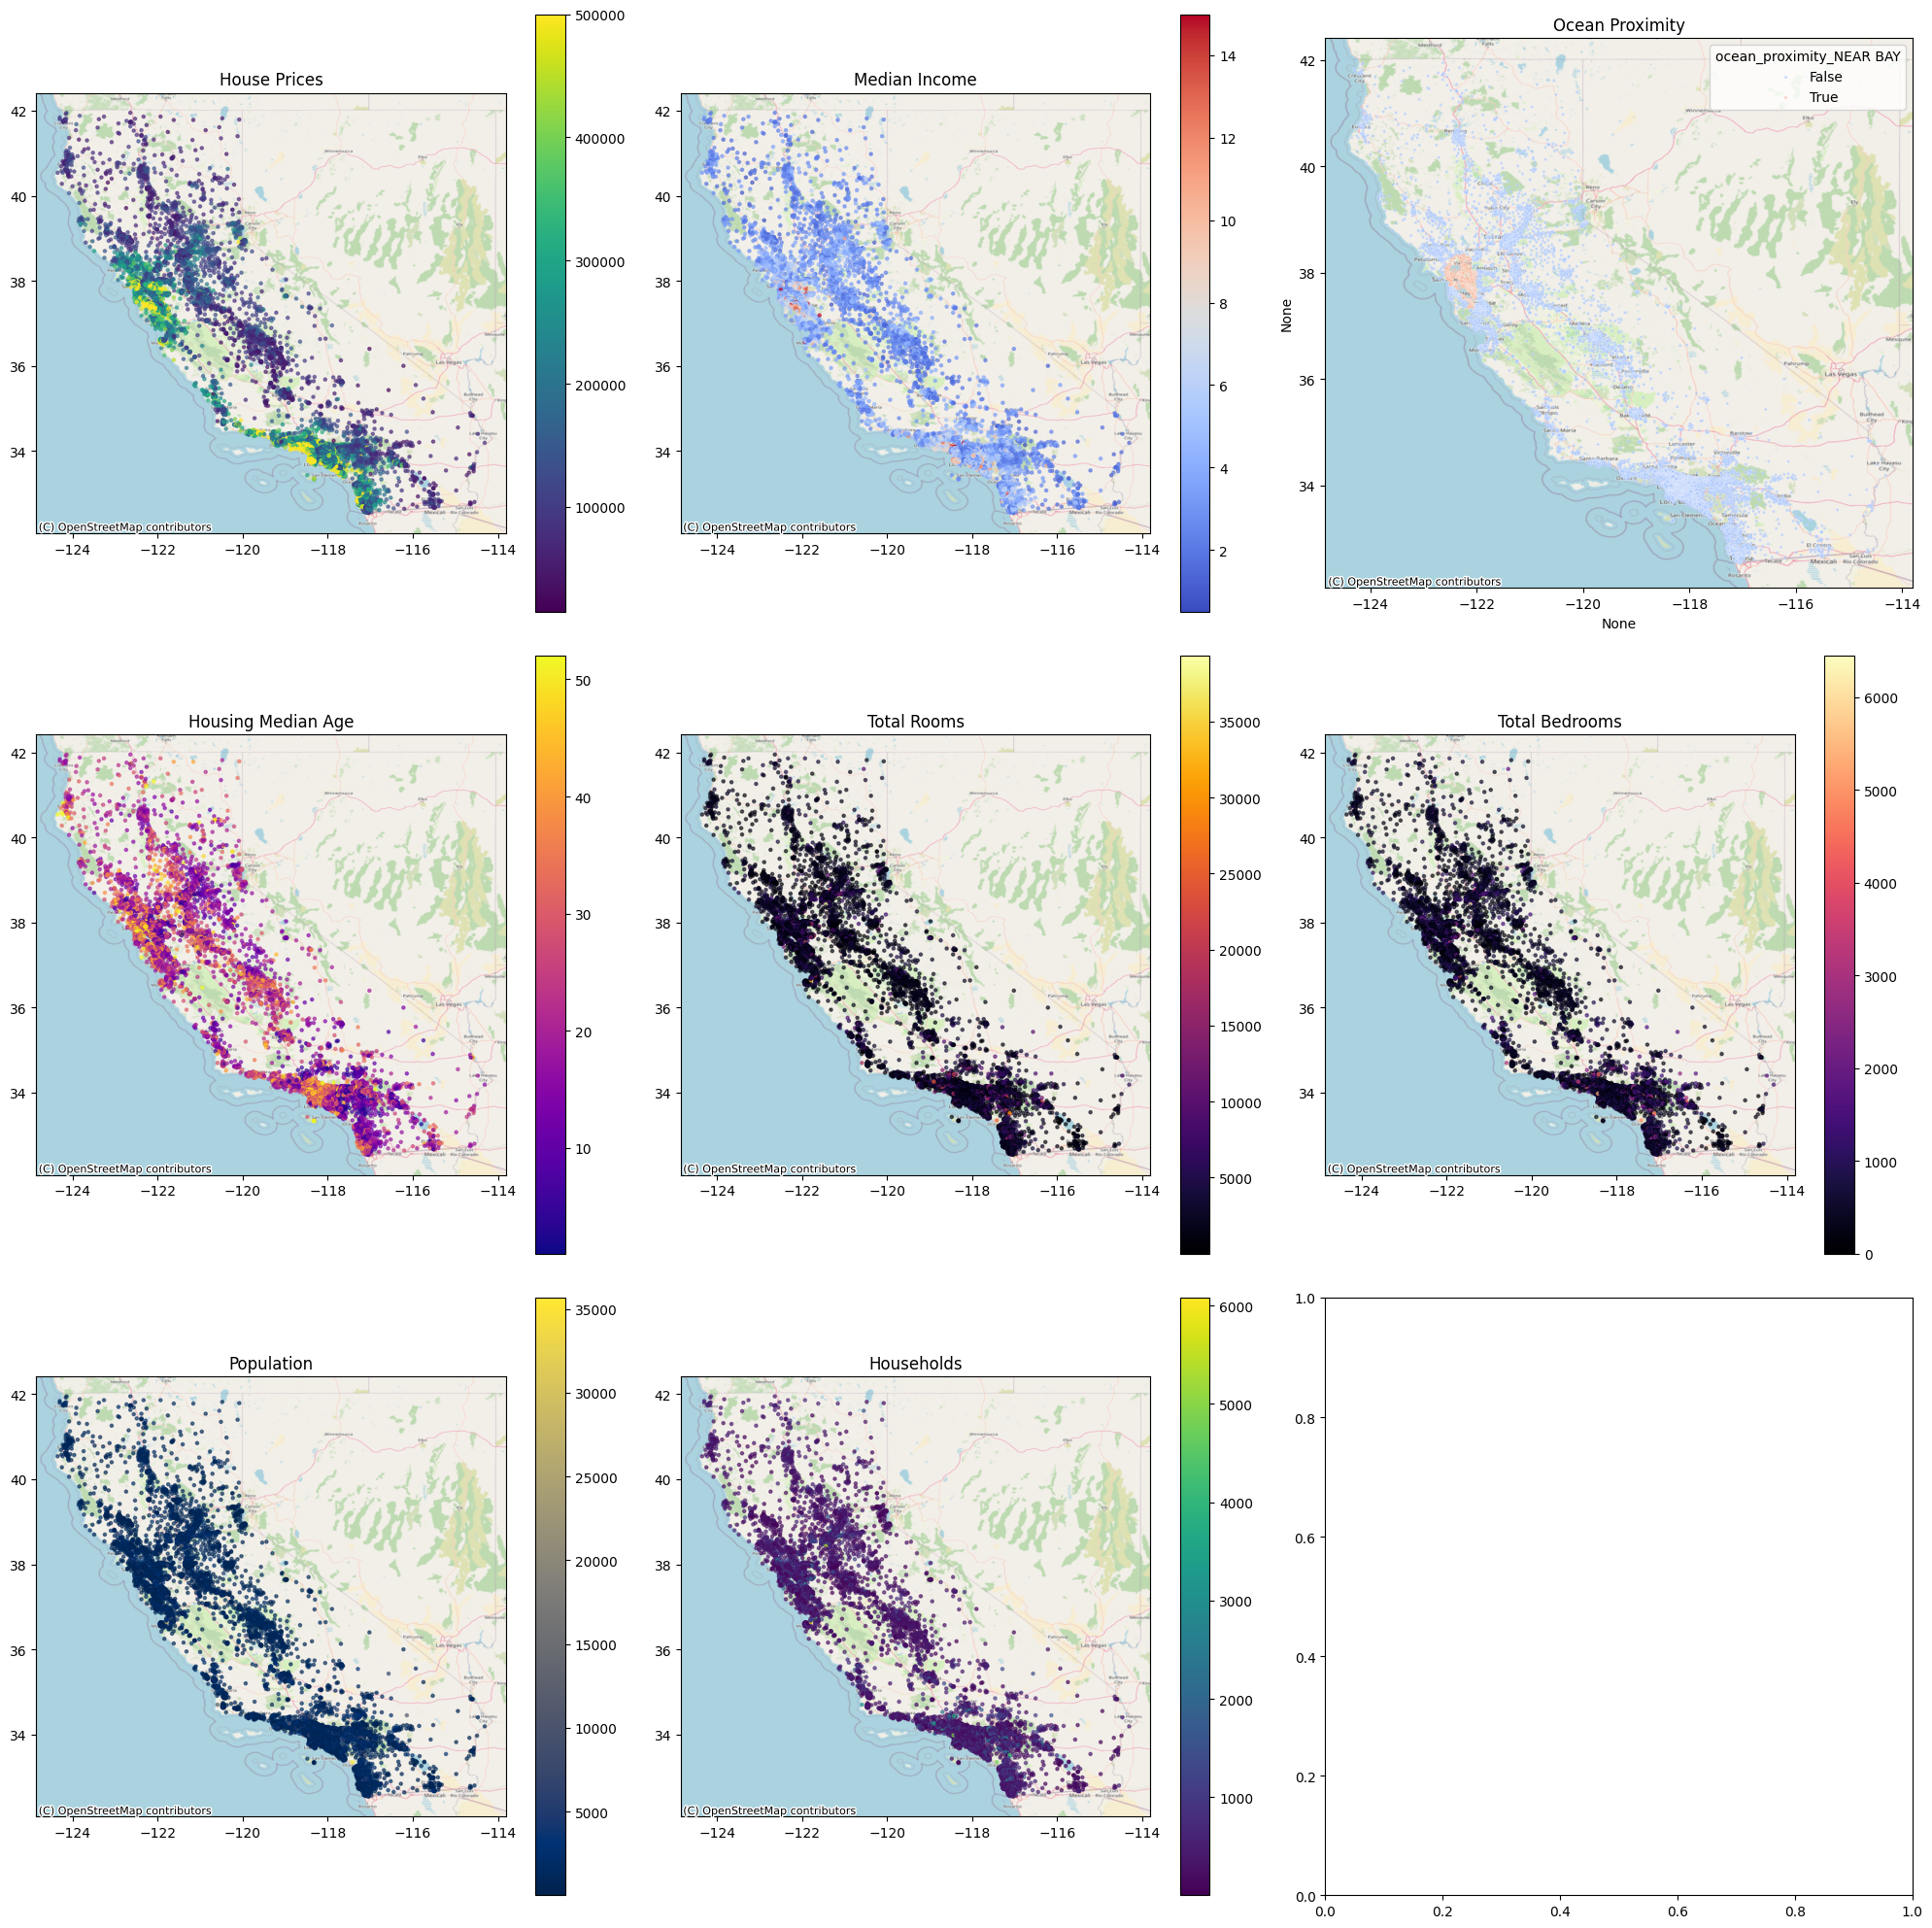

In [8]:
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.set_crs(epsg=4326, inplace=True)

# Function to create scatter plots with basemap background
def plot_with_basemap(ax, gdf, column, cmap, title):
    gdf.plot(column=column, cmap=cmap, markersize=5, alpha=0.6, ax=ax, legend=True)
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
    ax.set_title(title)

# Create subplots for various features
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# Scatter plot of house prices
plot_with_basemap(axes[0, 0], gdf, 'median_house_value', 'viridis', 'House Prices')

# Scatter plot of median income
plot_with_basemap(axes[0, 1], gdf, 'median_income', 'coolwarm', 'Median Income')

# Scatter plot by ocean proximity
sns.scatterplot(ax=axes[0, 2], x=gdf.geometry.x, y=gdf.geometry.y, hue=df['ocean_proximity_NEAR BAY'], 
                palette='coolwarm', alpha=0.6, s=5)
ctx.add_basemap(axes[0, 2], crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
axes[0, 2].set_title('Ocean Proximity')

# Scatter plot of housing median age
plot_with_basemap(axes[1, 0], gdf, 'housing_median_age', 'plasma', 'Housing Median Age')

# Scatter plot of total rooms
plot_with_basemap(axes[1, 1], gdf, 'total_rooms', 'inferno', 'Total Rooms')

# Scatter plot of total bedrooms
plot_with_basemap(axes[1, 2], gdf, 'total_bedrooms', 'magma', 'Total Bedrooms')

# Scatter plot of population
plot_with_basemap(axes[2, 0], gdf, 'population', 'cividis', 'Population')

# Scatter plot of households
plot_with_basemap(axes[2, 1], gdf, 'households', 'viridis', 'Households')

# Adjust layout
plt.tight_layout()
plt.show()

### Feature Engineering and Visualization

Before normalizing the data, we perform feature engineering and data visualization to understand the distributions and relationships between features.

**Distribution Plots:**

We visualize the distribution of numerical features to understand their spread and identify any potential outliers.

In [9]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       532.476211   1425.476744    499.539680       3.870671   
std        422.678333   1132.462122    382.329753       1.899822   
min          0.000000      3.000000      1.000000       0.499900   
25%        292.000000    787.000000    280.000000       2.563400   
50%        431.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

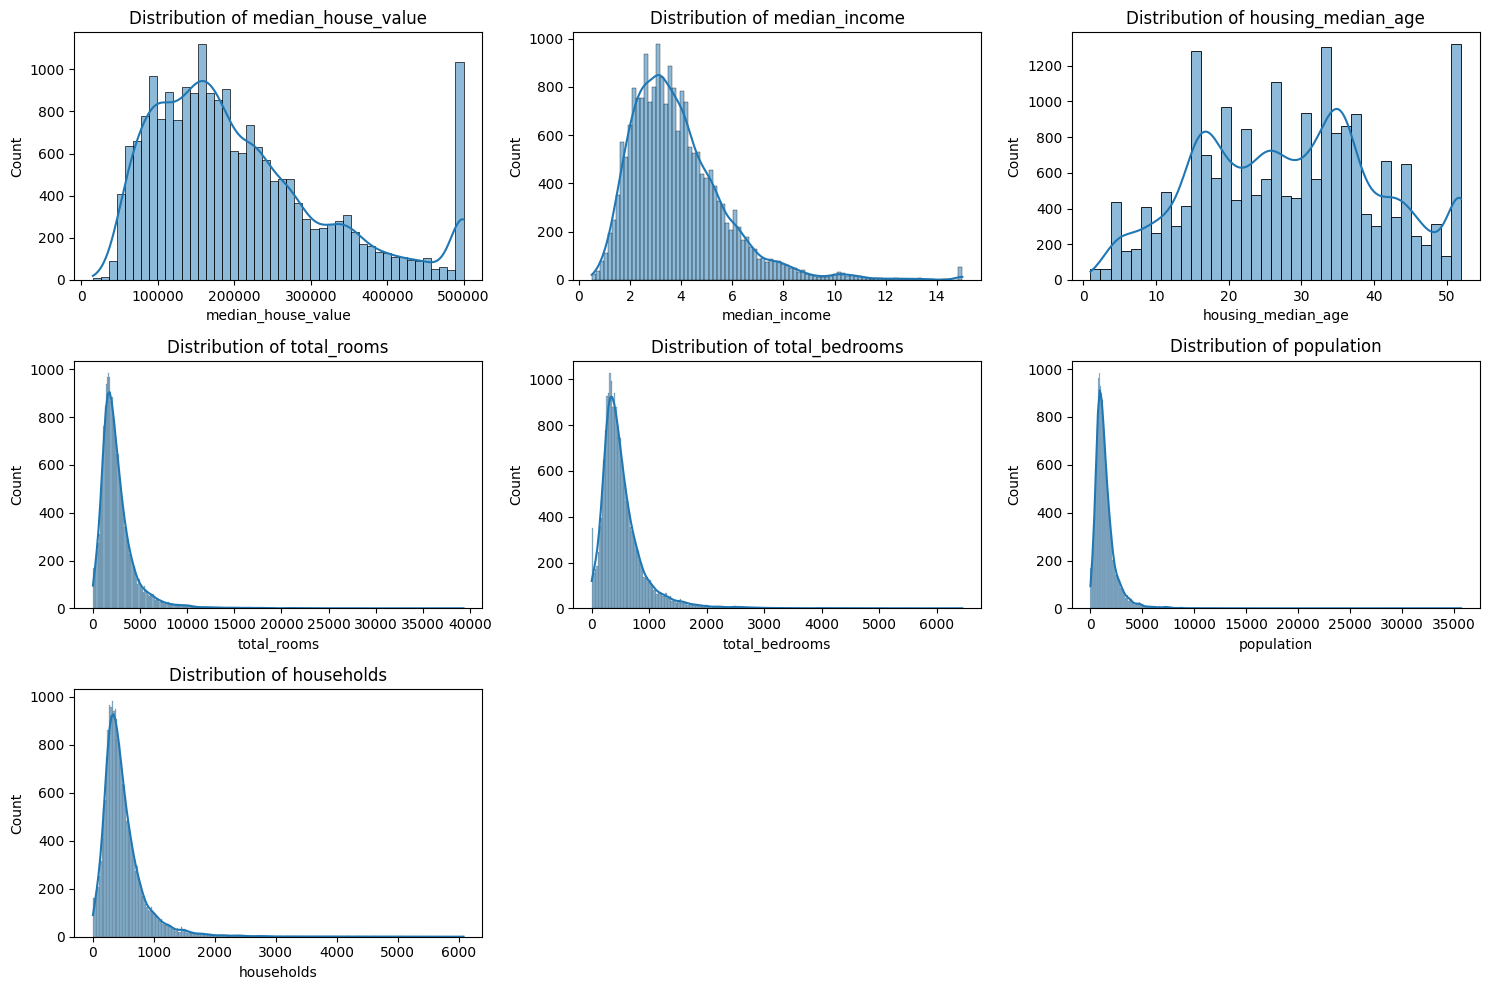

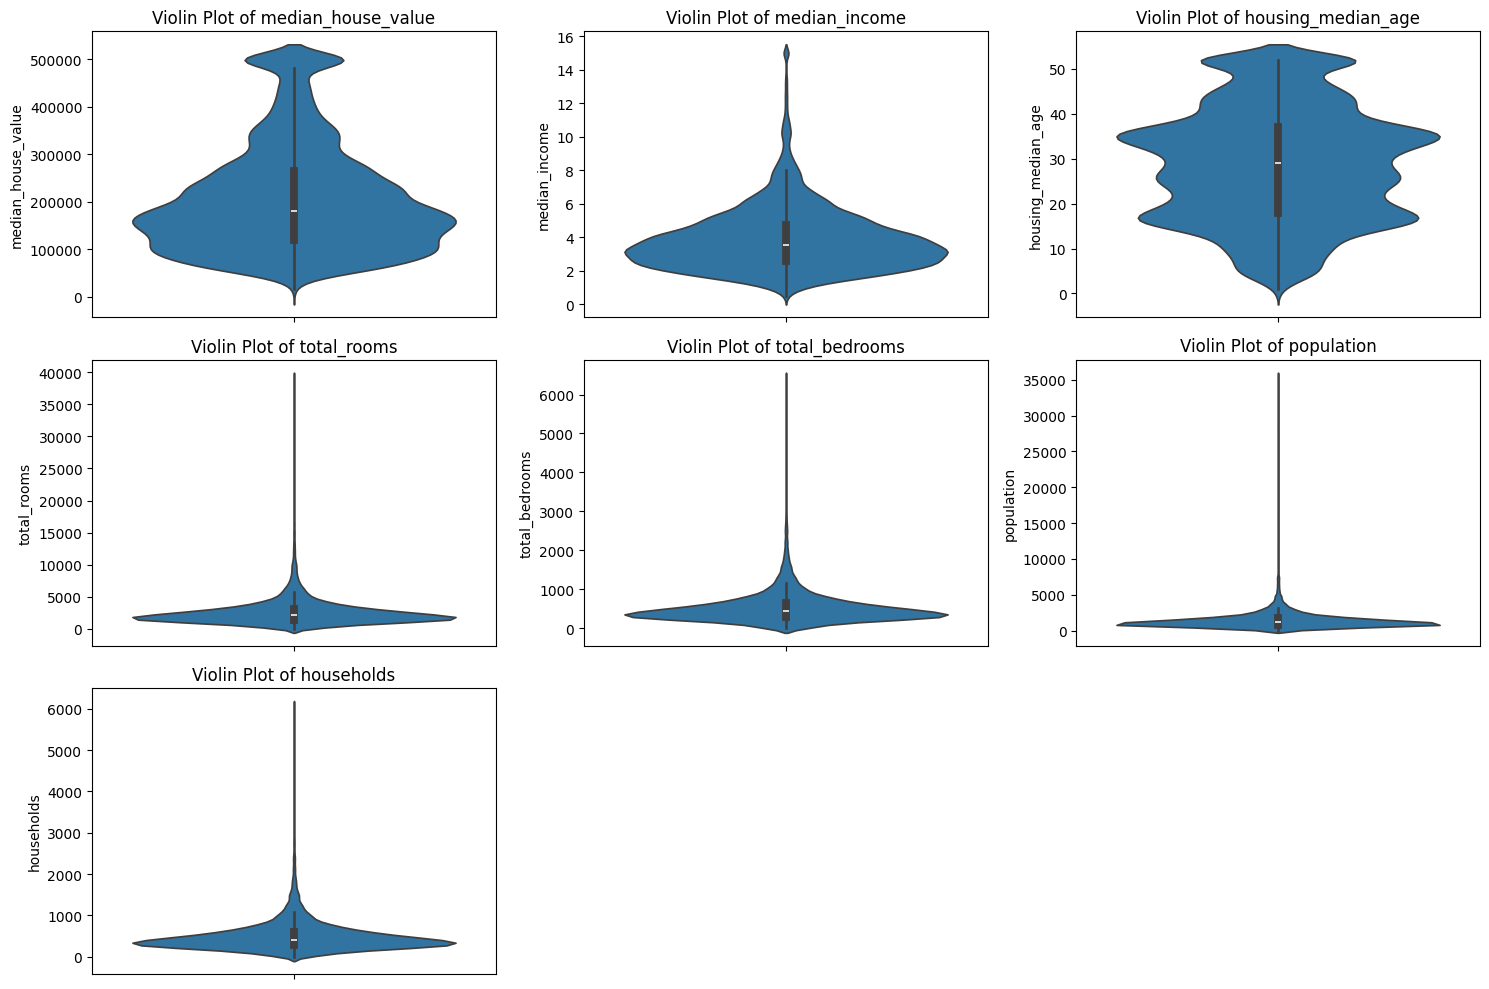

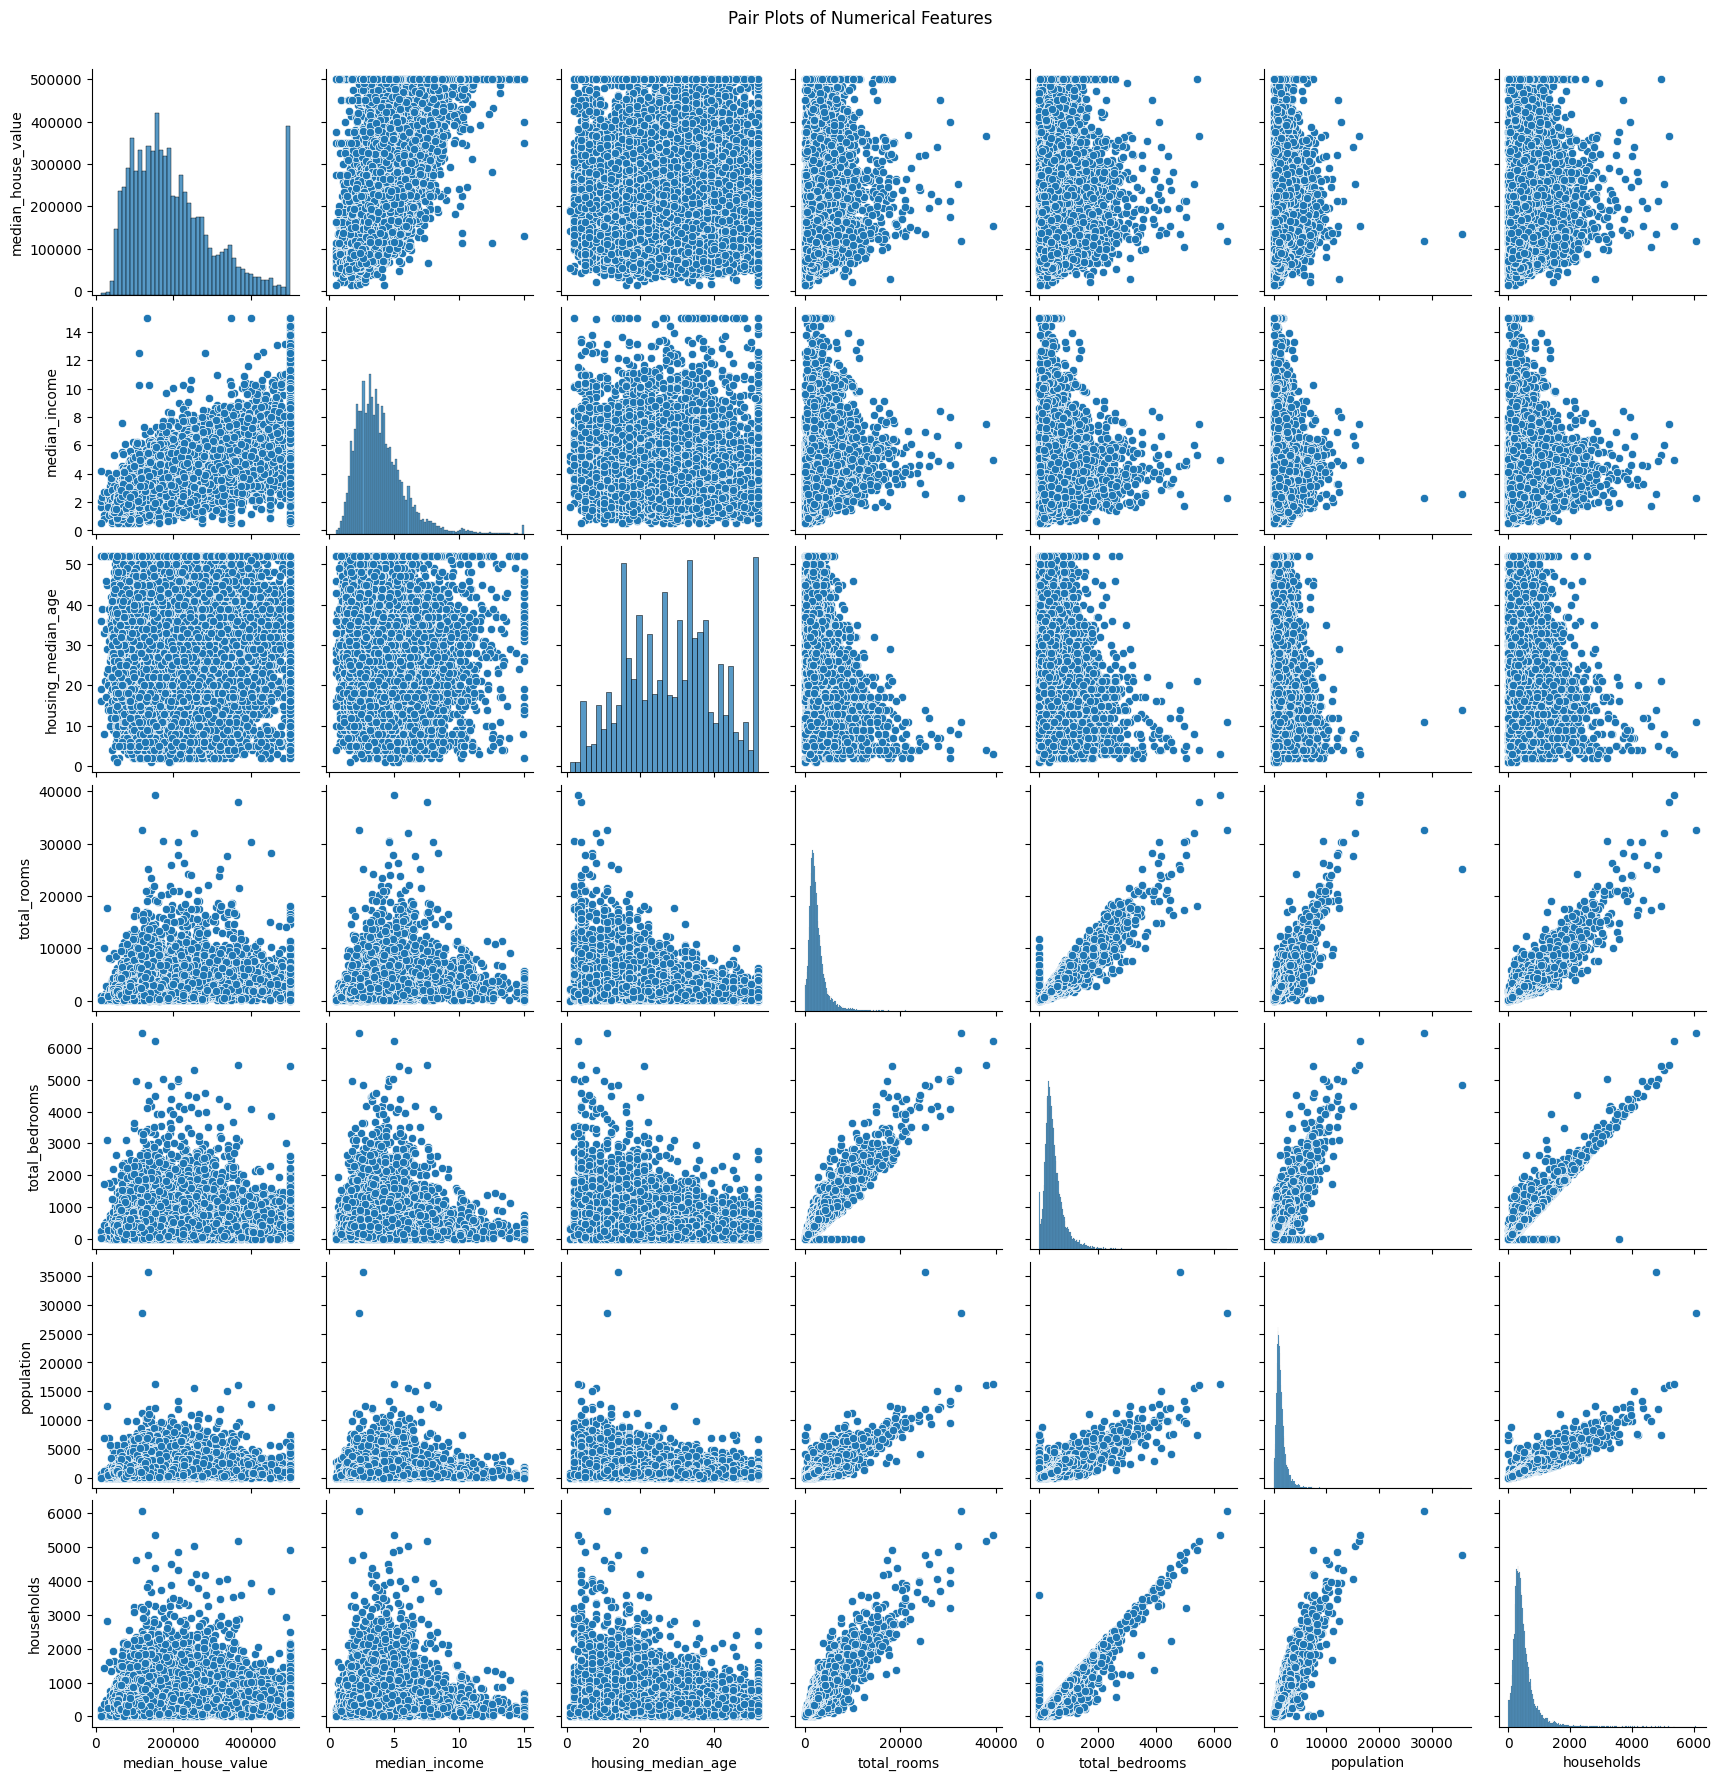

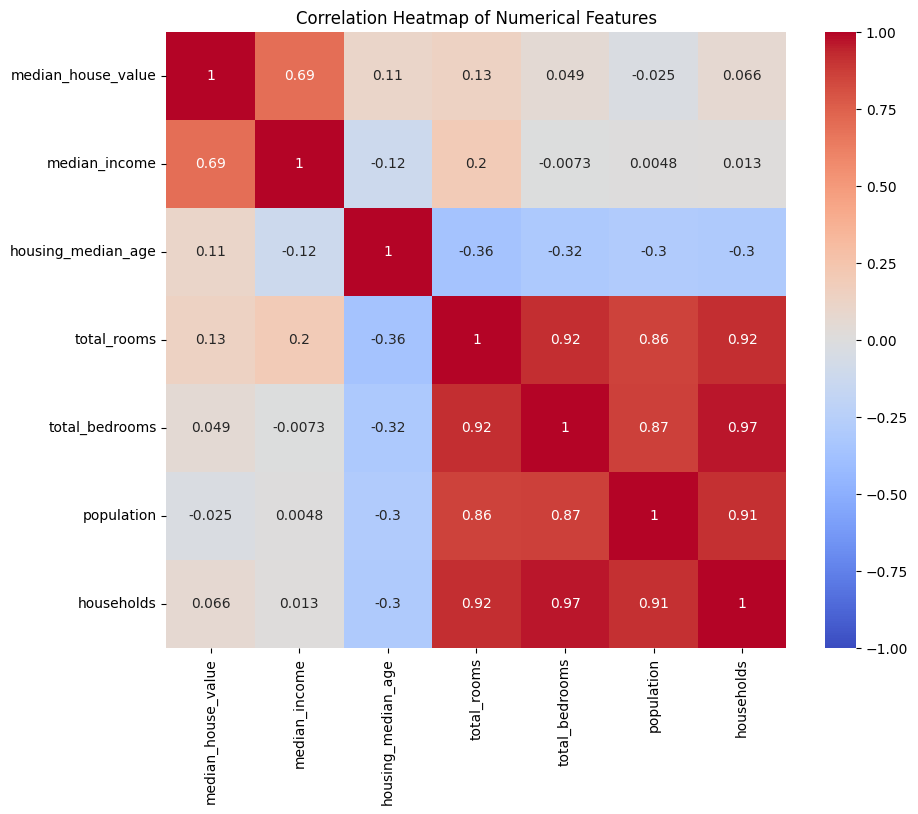

In [10]:
# Distribution Plots
numerical_features = ['median_house_value', 'median_income', 'housing_median_age', 
                      'total_rooms', 'total_bedrooms', 'population', 'households']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Violin Plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(y=df[feature])
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.show()


# Pair Plots
sns.pairplot(df[numerical_features])
plt.suptitle('Pair Plots of Numerical Features', y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Handling Outliers

Outliers can significantly affect the performance of machine learning models. We will identify and handle outliers in our numerical features.

**Identifying Outliers:**

We use box plots to identify outliers in the numerical features. Outliers are typically defined as data points that lie beyond 1.5 times the interquartile range (IQR) from the first and third quartiles.

```python

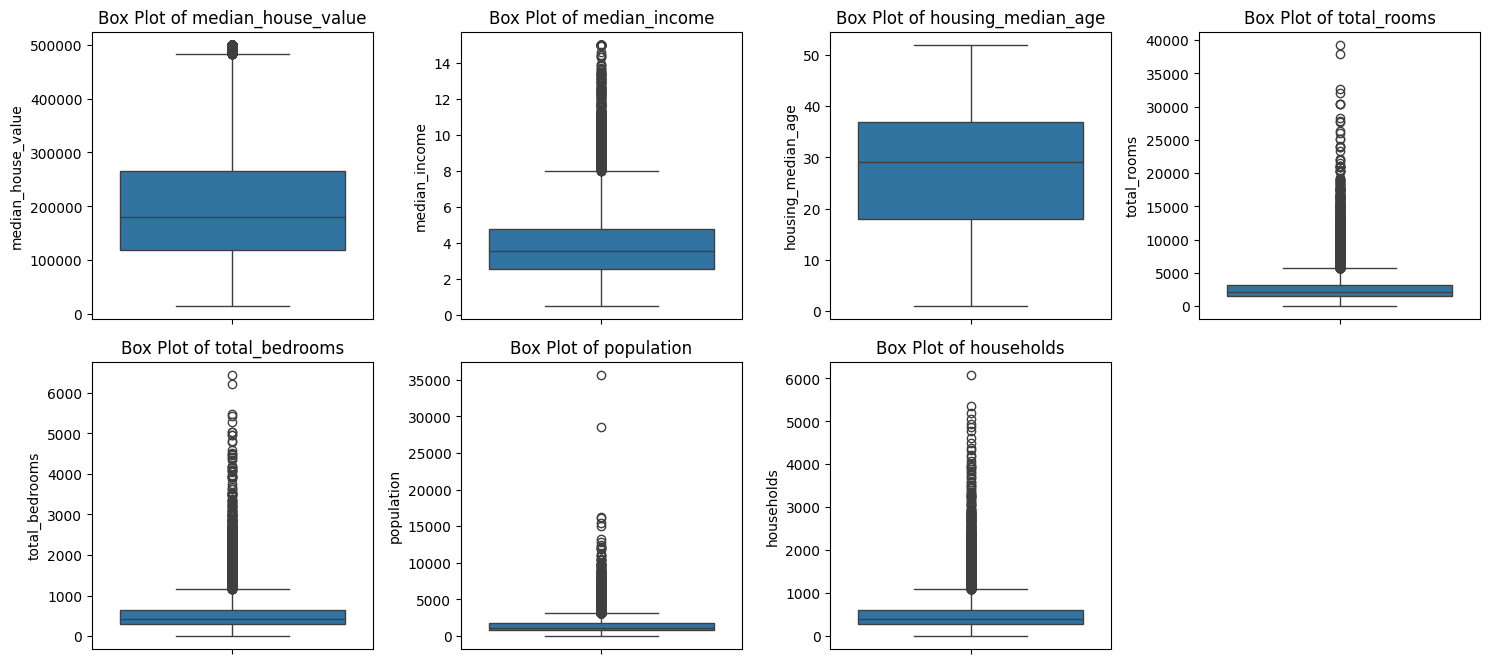

In [11]:
# Box Plots to Identify Outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

In [12]:
# Function to remove outliers beyond 1.5 * IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from all numerical features
for feature in numerical_features:
    df = remove_outliers(df, feature)

# Verify the changes
print(df.shape)

(16923, 13)


In [13]:
# Function to cap outliers to a certain percentile
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower_cap = df[column].quantile(lower_percentile)
    upper_cap = df[column].quantile(upper_percentile)
    df[column] = np.where(df[column] < lower_cap, lower_cap, df[column])
    df[column] = np.where(df[column] > upper_cap, upper_cap, df[column])
    return df

# Cap outliers for all numerical features
for feature in numerical_features:
    df = cap_outliers(df, feature)

# Verify the changes
print(df.shape)

(16923, 13)


In [14]:
# Function to cap outliers to a certain percentile
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower_cap = df[column].quantile(lower_percentile)
    upper_cap = df[column].quantile(upper_percentile)
    df[column] = np.where(df[column] < lower_cap, lower_cap, df[column])
    df[column] = np.where(df[column] > upper_cap, upper_cap, df[column])
    return df

# Cap outliers for all numerical features
for feature in numerical_features:
    df = cap_outliers(df, feature)

# Verify the changes
print(df.shape)


(16923, 13)


### Feature Engineering

**Creating New Features:**

We create new features such as `rooms_per_household`, `bedrooms_per_room`, and `population_per_household` to provide additional information to the model.

In [15]:
# Feature Engineering: Create new features
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# Verify the new features
df[['rooms_per_household', 'bedrooms_per_room', 'population_per_household']].head()

rooms_per_household  bedrooms_per_room  population_per_household
2             8.288136           0.129516                  2.802260
3             5.817352           0.184458                  2.547945
4             6.281853           0.172096                  2.181467
5             4.761658           0.231774                  2.139896
6             4.931907           0.192899                  2.128405

### Data Normalization

Data normalization is an essential step in preparing data for machine learning models. It helps to ensure that numerical features are on a similar scale, which can improve the performance and training stability of many algorithms.

We will perform two types of normalization:
1. **Standardization**: Scales the data to have a mean of 0 and a standard deviation of 1.
2. **Min-Max Normalization**: Scales the data to a fixed range, typically [0, 1].

**Standardization:**

We use `StandardScaler` from `sklearn.preprocessing` to standardize the numerical features.

In [16]:
# Select numerical features to be normalized
numerical_features = ['median_house_value', 'median_income', 'housing_median_age', 
                      'total_rooms', 'total_bedrooms', 'population', 'households', 
                      'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

# Standardization
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_features] = scaler.fit_transform(df[numerical_features])

# Normalization
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_features] = scaler.fit_transform(df[numerical_features])

# Verify the normalization
df_normalized[numerical_features].head()

median_house_value  median_income  housing_median_age  total_rooms  \
2            0.767277       1.000000                 1.0     0.277705   
3            0.739916       0.747431                 1.0     0.236966   
4            0.742196       0.455213                 1.0     0.311478   
5            0.558522       0.486209                 1.0     0.162030   
6            0.633258       0.424786                 1.0     0.503143   

   total_bedrooms  population  households  rooms_per_household  \
2        0.202032    0.164685    0.176116             0.110113   
3        0.250491    0.189588    0.226779             0.070738   
4        0.298951    0.192400    0.275030             0.078141   
5        0.226800    0.131346    0.195416             0.053915   
6        0.524019    0.404883    0.582630             0.056628   

   bedrooms_per_room  population_per_household  
2           0.165449                  0.037556  
3           0.235901                  0.032342  
4           0.220049                  0.024828  
5           0.296573                  0.023975  
6           0.246725                  0.023740

### Model Building and Evaluation

In this section, we will build and train several models, evaluate their performance, and compare the results. The models we will train are:
1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor
4. Bayesian Regression

We will use the following evaluation metrics:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- R-squared (R²)

In [17]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df_normalized.drop(columns='median_house_value')
y = df_normalized['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df_normalized.drop(columns='median_house_value')
y = df_normalized['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R2: {r2_lr}')


Linear Regression - MAE: 0.10882777311422209, MSE: 0.021097177230192474, R2: 0.609800175796807


In [19]:

# Train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor - MAE: {mae_dt}, MSE: {mse_dt}, R²: {r2_dt}")


Decision Tree Regressor - MAE: 0.10518102508245218, MSE: 0.024815953224966207, R²: 0.5410200862341559


In [20]:

# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - MAE: {mae_rf}, MSE: {mse_rf}, R²: {r2_rf}")


In [ ]:

# Train a Bayesian Ridge Regression model
bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_bayes_ridge = bayesian_ridge_model.predict(X_test)
mae_bayes_ridge = mean_absolute_error(y_test, y_pred_bayes_ridge)
mse_bayes_ridge = mean_squared_error(y_test, y_pred_bayes_ridge)
r2_bayes_ridge = r2_score(y_test, y_pred_bayes_ridge)

print(f'Bayesian Ridge Regression - MAE: {mae_bayes_ridge}, MSE: {mse_bayes_ridge}, R2: {r2_bayes_ridge}')


Bayesian Ridge Regression - MAE: 0.10881048859985573, MSE: 0.021081597127838594, R2: 0.6100883353516717


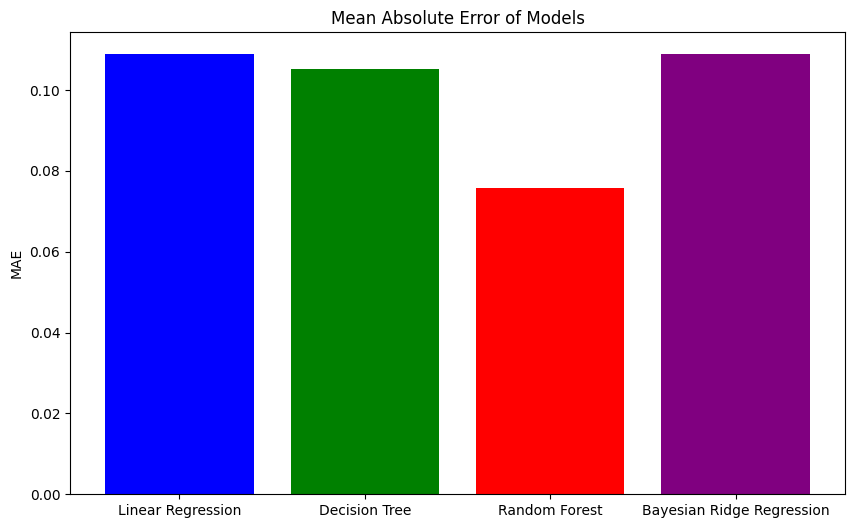

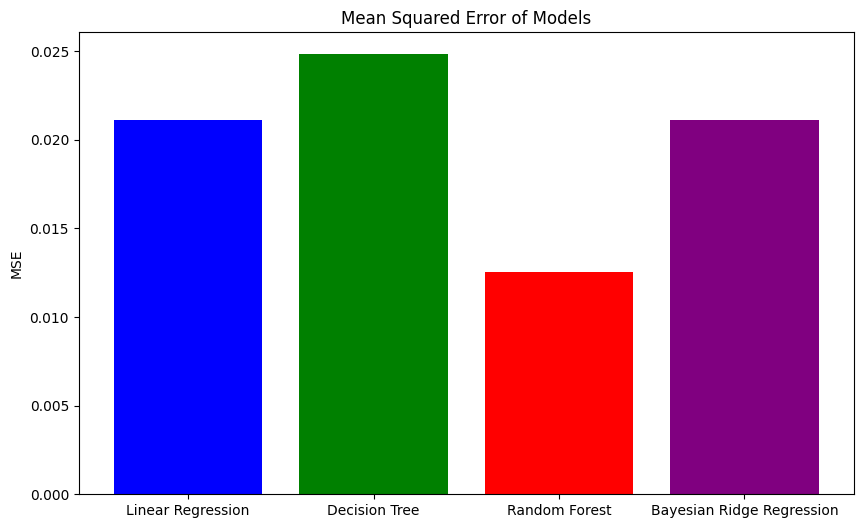

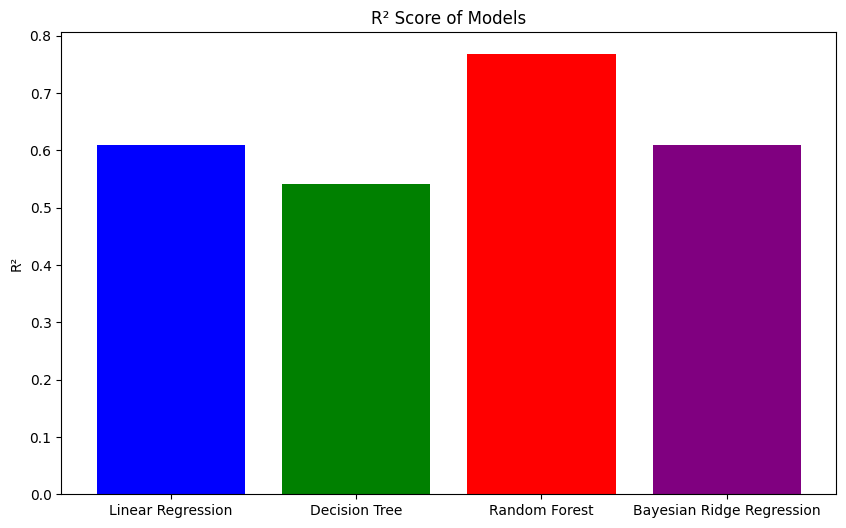

In [ ]:

# Model performance metrics
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Bayesian Ridge Regression']
mae = [mae_lr, mae_dt, mae_rf, mae_bayes_ridge]
mse = [mse_lr, mse_dt, mse_rf, mse_bayes_ridge]
r2 = [r2_lr, r2_dt, r2_rf, r2_bayes_ridge]

# Plot MAE
plt.figure(figsize=(10, 6))
plt.bar(models, mae, color=['blue', 'green', 'red', 'purple'])
plt.title('Mean Absolute Error of Models')
plt.ylabel('MAE')
plt.show()

# Plot MSE
plt.figure(figsize=(10, 6))
plt.bar(models, mse, color=['blue', 'green', 'red', 'purple'])
plt.title('Mean Squared Error of Models')
plt.ylabel('MSE')
plt.show()

# Plot R²
plt.figure(figsize=(10, 6))
plt.bar(models, r2, color=['blue', 'green', 'red', 'purple'])
plt.title('R² Score of Models')
plt.ylabel('R²')
plt.show()


## Model Evaluation Report

### Introduction

In this project, we trained and evaluated four different models to predict housing prices using the California Housing Prices dataset. The models include:

1. Linear Regression
2. Decision Tree
3. Random Forest
4. Bayesian Ridge Regression

### Model Performance

We used three metrics to evaluate the models:

- **Mean Absolute Error (MAE)**: Measures the average magnitude of errors in a set of predictions, without considering their direction.
- **Mean Squared Error (MSE)**: Measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.
- **R² Score**: Represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

The performance of each model is summarized below:

#### Linear Regression
- **MAE**: 0.1088
- **MSE**: 0.0211
- **R²**: 0.6098

#### Decision Tree
- **MAE**: 0.1052
- **MSE**: 0.0248
- **R²**: 0.5410

#### Random Forest
- **MAE**: 0.0757
- **MSE**: 0.0126
- **R²**: 0.7678

#### Bayesian Ridge Regression
- **MAE**: 0.1088
- **MSE**: 0.0211
- **R²**: 0.6101

### Conclusion

Based on our evaluation, the `Random Forest` model performed the best overall, with the lowest MAE and MSE, and the highest R² score. This indicates that `Random Forest` is the most accurate model for predicting housing prices in this dataset. Future work could involve further tuning the hyperparameters of these models and exploring additional feature engineering techniques to improve performance even further.
